# The ESGF Virtual Aggregation

The ESGF Virtual Aggregation is an analysis of a new proposed data workflow and a companion dataset that aims to advance the sharing and reuse of scientific climate data stored in the Earth System Grid Federation. The ESGF holds several petabytes of data distributed between data centers around the globe and the data workflow proposal enhances the federation, beyond file search and download, by allowing remote climate data analysis on data analysis ready, virtually aggregated, climate datasets. The companion dataset serves as demonstration of a viable implementation of the data workflow and it includes all CMIP6 data from ESGF up to 2022. The ESGF Virtual Aggregation analysis serves as a test case for the viability of the data workflow and provides the basis for discussions on the future of the ESGF infrastructure, regarding the continuity of federation services such as OpenDAP and the Search REST API.

In [1]:
import xarray
import dask

In [2]:
dask.config.set(scheduler="processes")

In [4]:
dataset = "https://hub.ipcc.ifca.es/thredds/dodsC/esgeva/ensemble/CMIP6/ScenarioMIP/day/CMIP6_ScenarioMIP_CNRM-CERFACS_CNRM-CM6-1_ssp245_day_gr_v20190410/replicas/aims3.llnl.gov/CMIP6_ScenarioMIP_CNRM-CERFACS_CNRM-CM6-1_ssp245_day_tas_gr_v20190410_aims3.llnl.gov.ncml"
ds = xarray.open_dataset(dataset).chunk({"time": 100})
tas = ds["tas"]
tas

<xarray.DataArray 'tas' (variant_label: 5, time: 31411, lat: 128, lon: 256)>
dask.array<xarray-tas, shape=(5, 31411, 128, 256), dtype=float32, chunksize=(5, 100, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon            (lon) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
    height         float64 ...
  * time           (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T1...
  * variant_label  (variant_label) |S64 b'r2i1p1f2' b'r3i1p1f2' ... b'r6i1p1f2'
Attributes:
    long_name:           Near-Surface Air Temperature
    _CoordinateAxes:     variant_label height time lat lon
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella
    _ChunkSizes:         [  1 128 256]

In [5]:
tas.isel(variant_label=slice(0,3))

<xarray.DataArray 'tas' (variant_label: 3, time: 31411, lat: 128, lon: 256)>
dask.array<getitem, shape=(3, 31411, 128, 256), dtype=float32, chunksize=(3, 100, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon            (lon) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
    height         float64 ...
  * time           (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T1...
  * variant_label  (variant_label) |S64 b'r2i1p1f2' b'r3i1p1f2' b'r4i1p1f2'
Attributes:
    long_name:           Near-Surface Air Temperature
    _CoordinateAxes:     variant_label height time lat lon
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella
    _ChunkSizes:         [  1 128 256]

In [6]:
%time m = ds["tas"].isel(variant_label=slice(0,3)).mean(["lat", "lon"]).compute()

CPU times: user 275 ms, sys: 74 ms, total: 349 ms
Wall time: 5min 41s


In [7]:
ds.attrs["size_human"]

'10.7 GiB'

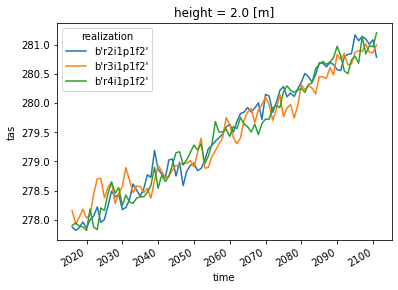

In [8]:
m.resample({"time": "Y"}).mean().plot.line(x="time")